In [2]:
%run ./setup.ipynb

Pandas v0.25.1
Numpy v1.17.2
Scikit-Learn v0.21.3
Seaborn v0.9.0


In [179]:
bank = pd.read_csv('../data/bank-full.csv', sep = ';')

In [180]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [181]:
y = pd.get_dummies(bank['y'], columns = ['y'], drop_first = True)
yA = y

In [182]:
model = {}

In [183]:
bank_client = bank.iloc[: , 0:8]
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


In [184]:
from sklearn.preprocessing import LabelEncoder

def encode_label(label, df, model):
    encoder = LabelEncoder()
    df[label] = encoder.fit_transform(df[label])
    model[f'{label}_encoder'] = encoder

In [185]:
encode_label('job', bank_client, model)
encode_label('marital', bank_client, model)
encode_label('education', bank_client, model)
encode_label('default', bank_client, model)
encode_label('housing', bank_client, model)
encode_label('loan', bank_client, model)

In [186]:
bank_client.head()

,age,job,marital,education,default,balance,housing,loan
0,58,4,1,2,0,2143,1,0
1,44,9,2,1,0,29,1,0
2,33,2,1,1,0,2,1,1
3,47,1,1,3,0,1506,1,0
4,33,11,2,3,0,1,0,0


In [187]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [188]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 8:12]
bank_related.head()

,contact,day,month,duration
0,unknown,5,may,261
1,unknown,5,may,151
2,unknown,5,may,76
3,unknown,5,may,92
4,unknown,5,may,198


In [189]:
encode_label('contact', bank_related, model)
encode_label('month', bank_related, model)

In [190]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data

duration(bank_related);

In [191]:
bank_related.head()

,contact,day,month,duration
0,2,5,8,3
1,2,5,8,2
2,2,5,8,1
3,2,5,8,1
4,2,5,8,3


In [192]:
# bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
# bank_se.head()

In [193]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,-1,0,unknown
1,1,-1,0,unknown
2,1,-1,0,unknown
3,1,-1,0,unknown
4,1,-1,0,unknown


In [194]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success', 'unknown', 'other'], [1,2,3,4,5], inplace  = True)

In [195]:
bank_final = pd.concat([bank_client, bank_related, bank_o], axis = 1)

In [196]:
model['columns'] = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
                     'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
# bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
#                      'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
#                      'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]

bank_final = bank_final[model['columns']]

bank_final.shape

(45211, 16)

In [197]:
bank_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,4
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,4
2,2,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,4
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,4
4,2,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,4


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [199]:
#IMBALANCED DATASET FIX
bank_final1 = pd.concat([bank_final, y], axis = 1)
df_majority = bank_final1[bank_final1['yes'] == 0]
df_minority = bank_final1[bank_final1['yes'] == 1]

In [200]:
#IMBALANCED DATASET FIX
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(4640*2),    
                                 random_state=123)

In [201]:
#IMBALANCED DATASET FIX
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
y_new = df_upsampled['yes']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('yes', axis = 1), y_new, test_size = 0.1942313295, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [203]:
# Scaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [204]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=6, random_state = 12)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=6, scoring = 'accuracy').mean())

In [205]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier'],
                'Score':  [RFCCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.936159


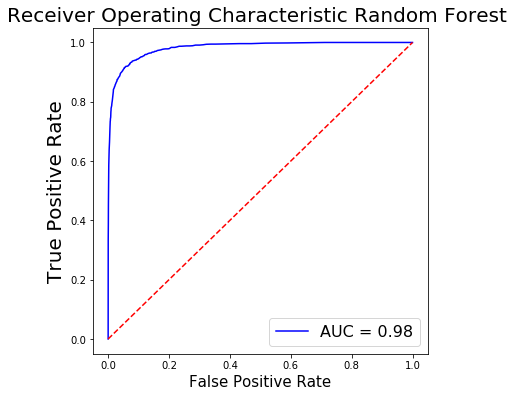

In [206]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [208]:
print('Cross Validation mean: ', (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=6, scoring = 'accuracy').mean()))

Cross Validation mean:  0.9361585225414608


In [209]:
import pickle

In [210]:
model['classifier'] = rfc

with open('../model/model.pk', 'wb') as f1:
    pickle.dump(model, f1)
    
with open('../model/scaler.pk', 'wb') as f2:
    pickle.dump(sc_X, f2)

In [211]:
model.keys()

dict_keys(['job_encoder', 'marital_encoder', 'education_encoder', 'default_encoder', 'housing_encoder', 'loan_encoder', 'contact_encoder', 'month_encoder', 'columns', 'classifier'])